In [1]:
from imageGAN import *
import matplotlib.pyplot as plt
import numpy
import os
from dataset_helper import *
import random as rd

In [2]:
dim = (256,256,3)
batchsize=64
epochs = 1
latentDim = 1000
stride = 2
arch = [32,32,16,16,8]
arch_desc = [16,32,64,32,32]
optGen = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
optDisc = keras.optimizers.Adam(lr=0.0001, beta_1=0.5)

model = "../models/skyline_gan_2_"

In [3]:
gen = Generator(dim,arch,latent_size=latentDim,stride=stride)
des = Discriminator(dim,arch_desc,stride=2)

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
dense (Dense)                (None, 2048)              2050048   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 2048)              0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 32)        92

In [4]:
gan = ImageGAN(gen,des,batchsize,optGen,optDisc)
gan.compile()#,run_eagerly=True)
gan.generator.generator.load_weights(model+"generator")
gan.discriminator.discriminator.load_weights(model+"discriminator")

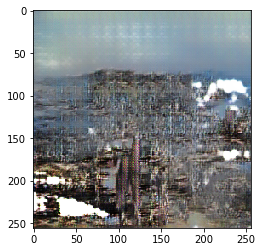

In [5]:
image = gan.generator.generateImages(1)
plt.imshow(image[0])

In [23]:
x = 0
images = gan.generator.generateImages(1000)
scores = gan.discriminator.discriminator.predict(images)
for image,score in zip(images,scores):#gan.generateImages(1000):
    if score > .1:
        x += 1
        saveImage(image,"../data/generated_skyline_images_gan/generated_image_" + str(x) + ".jpg")

In [8]:
names = ["../data/skyline_images/" + x for x in os.listdir("../data/skyline_images/") if ".jpg" in x][:100]



In [9]:
tensor = getTrainingTensor(names,dim)

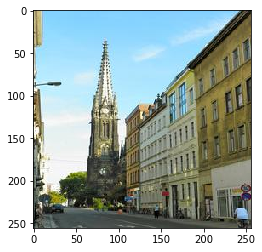

In [45]:
randomImageSelect = tensor[rd.sample(list(range(len(tensor))),k=1)[0]]
plt.imshow(randomImageSelect)

In [46]:
n=50
generatedImages  = gan.generator.generateImages(int(n*n))
print("images made")
mosiac = makeMosiacImageWithBase(generatedImages,n,randomImageSelect)

images made


In [17]:
plt.imshow(mosiac)

Error in callback <function flush_figures at 0x7f9a7b6d1950> (for post_execute):


KeyboardInterrupt: 

In [47]:
saveImage(mosiac,"../data/generated_skyline_images_gan/mosiac_large2.jpg")